In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [38]:

netflix = yf.download("NFLX", start="2020-01-01", end="2025-06-23")
netflix.head()


C:\Users\sheno\AppData\Local\Temp\ipykernel_18832\3890508335.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  netflix = yf.download("NFLX", start="2020-01-01", end="2025-06-23")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2020-01-02,329.809998,329.980011,324.779999,326.100006,4485800
2020-01-03,325.899994,329.859985,325.529999,326.779999,3806900
2020-01-06,335.829987,336.359985,321.200012,323.119995,5663100
2020-01-07,330.750000,336.700012,330.299988,336.470001,4703200
2020-01-08,339.260010,342.700012,331.049988,331.489990,7104500


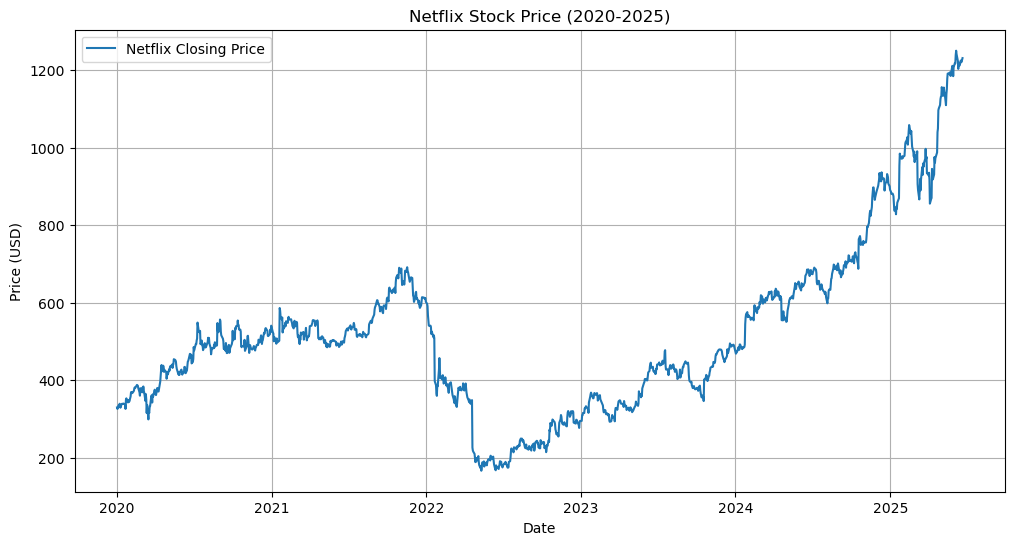

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(netflix['Close'], label='Netflix Closing Price')
plt.title("Netflix Stock Price (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


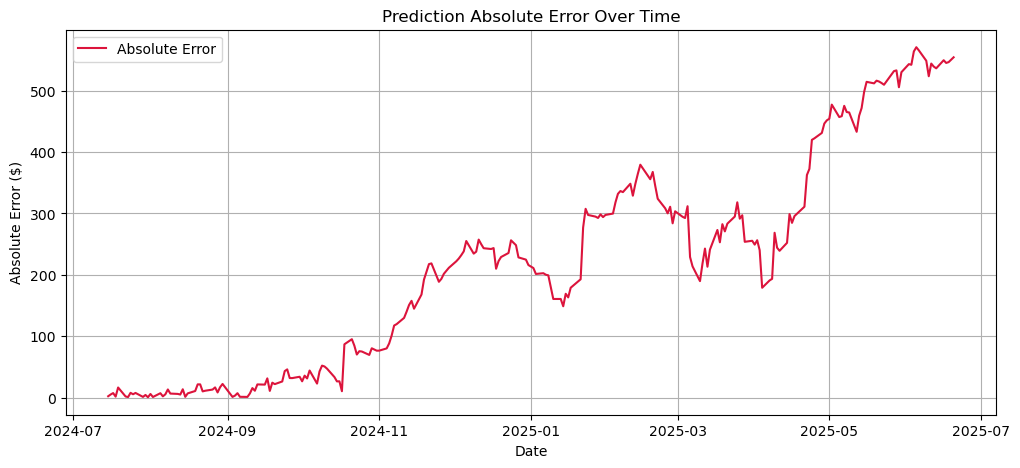

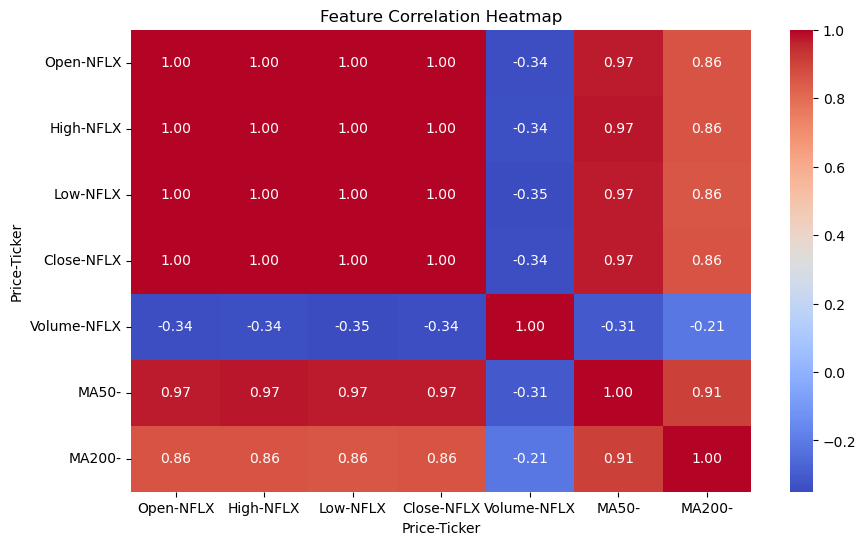

In [50]:
plt.figure(figsize=(12, 5))
plt.plot(comparison['Absolute Error'], label='Absolute Error', color='crimson')
plt.title("Prediction Absolute Error Over Time")
plt.xlabel("Date")
plt.ylabel("Absolute Error ($)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(netflix[['Open', 'High', 'Low', 'Close', 'Volume', 'MA50', 'MA200']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
netflix.describe()


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
count,1374.000000,1374.000000,1374.000000,1374.000000,1.374000e+03
mean,517.705735,524.993784,509.994207,517.347634,6.175701e+06
std,218.145829,219.952940,215.826548,217.664493,6.103070e+06
min,166.369995,172.059998,162.710007,163.960007,1.144000e+06
25%,367.987495,374.927505,361.004997,367.527504,3.200925e+06
50%,491.484985,497.464996,485.270004,492.000000,4.660000e+06
75%,612.930008,620.752487,607.130020,614.375015,7.140625e+06
max,1250.520020,1262.810059,1237.290039,1259.410034,1.333875e+08


In [40]:
netflix['MA50'] = netflix['Close'].rolling(window=50).mean()
netflix['MA200'] = netflix['Close'].rolling(window=200).mean()
netflix.dropna(inplace=True)  


In [11]:
features = ['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']
X = netflix[features]
y = netflix['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.9987412763586752
MSE: 40.05328290443822


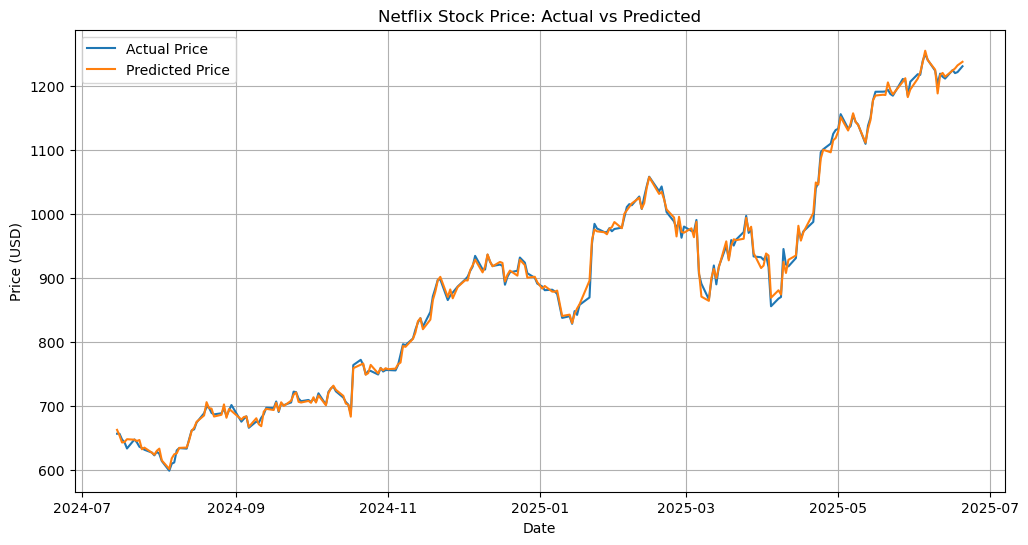

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price')
plt.title('Netflix Stock Price: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    mean_squared_log_error,
    max_error,
    explained_variance_score
)
import numpy as np

features = ['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200']
X = netflix[features]
y = netflix['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 🧮 Metrics
print("📊 Accuracy Metrics for Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Median Absolute Error: {median_absolute_error(y_test, y_pred):.4f}")
print(f"Max Error: {max_error(y_test, y_pred):.4f}")
print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred):.4f}")
# التأكد من تحويل y_test و y_pred إلى NumPy arrays
y_test_arr = np.array(y_test).ravel()
y_pred_arr = np.array(y_pred).ravel()

if (y_test_arr > 0).all() and (y_pred_arr > 0).all():
    print(f"Mean Squared Log Error (MSLE): {mean_squared_log_error(y_test_arr, y_pred_arr):.4f}")
else:
    print("MSLE: ❌ Not applicable (some values ≤ 0)")


📊 Accuracy Metrics for Linear Regression:
R² Score: 0.9987
Mean Absolute Error (MAE): 4.7235
Mean Squared Error (MSE): 40.0533
Root Mean Squared Error (RMSE): 6.3288
Median Absolute Error: 3.3969
Max Error: 26.2490
Explained Variance Score: 0.9987
Mean Squared Log Error (MSLE): 0.0001


C:\Users\sheno\AppData\Local\Temp\ipykernel_18832\1337498664.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\sheno\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


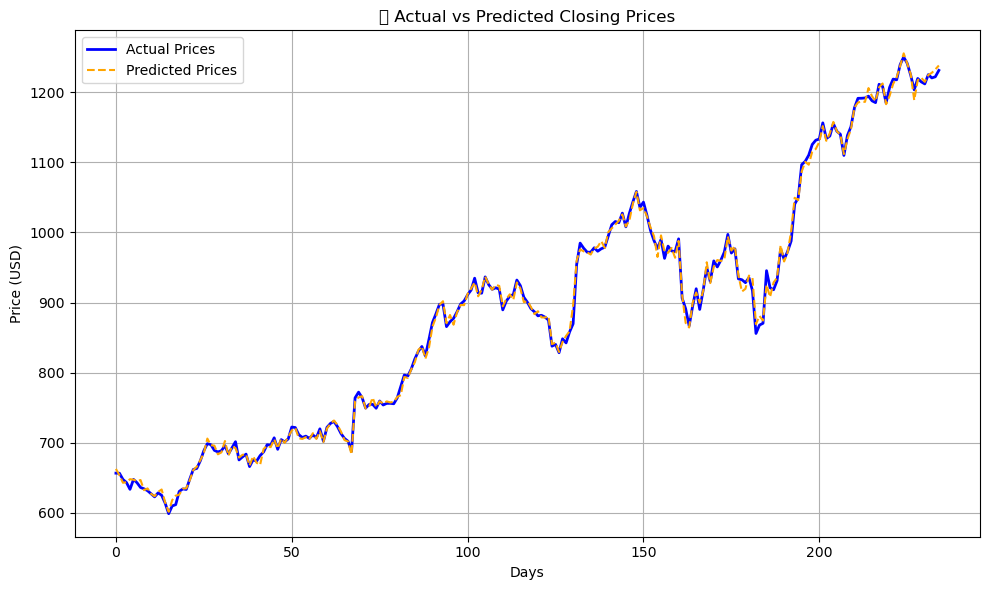

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Prices', color='orange', linestyle='--')
plt.title('📊 Actual vs Predicted Closing Prices')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Shenouda Safwat Shenouda